<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_ex_Distributions_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="ITM">
</head>

<img src="https://maua.br/images/selo-60-anos-maua.svg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Lab Ditribuições**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Q1.

Considere a base de dados `glasses` de materiais de vidros reciclados.

* Quais dentre os valores 'clarity', 'density', 'purity' e 'silica' definem/separam mais claramente a qualidade dos vidros reciclados?
* Para isso faça um gráfico distribuição dos valores pelas classes de qualidade.
* Crie os gráficos para os 4 valores, em uma única figura, e empregue o comando `zip()` para iterar os valores e eixos da figura.





In [2]:
df = pd.read_csv('https://github.com/Rogerio-mack/IMT_CD_2024/raw/main/data/glasses.csv')
df.head()


,color,clarity,density,purity,silica,quality,price+
0,E,51.0,35.0,14.0,2.0,Accept,326
1,E,49.0,30.0,14.0,2.0,Accept,326
2,E,47.0,32.0,13.0,2.0,Accept,327
3,I,46.0,31.0,15.0,2.0,Accept,334
4,J,50.0,36.0,14.0,2.0,Accept,335


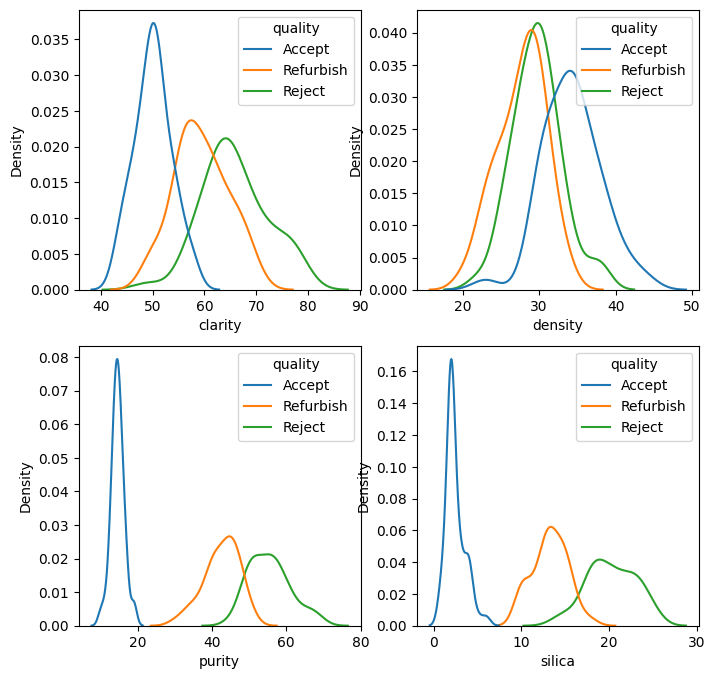

In [3]:
fig, ax = plt.subplots(2,2,figsize=(8,8))

for ax, c in zip(ax.flatten(),['clarity', 'density', 'purity', 'silica']):
  sns.kdeplot(x=df[c], data=df, hue='quality',ax=ax)

plt.show()

# Q2.

Considere a base de dados `glasses` de materiais de vidros reciclados.

* Quais dentre os valores 'clarity', 'price+', 'purity' e 'silica' têm uma distribuição mais próxima da normal? Faça uma análise através da visualização dos dados.
* Crie os gráficos para os 4 valores, em uma única figura.

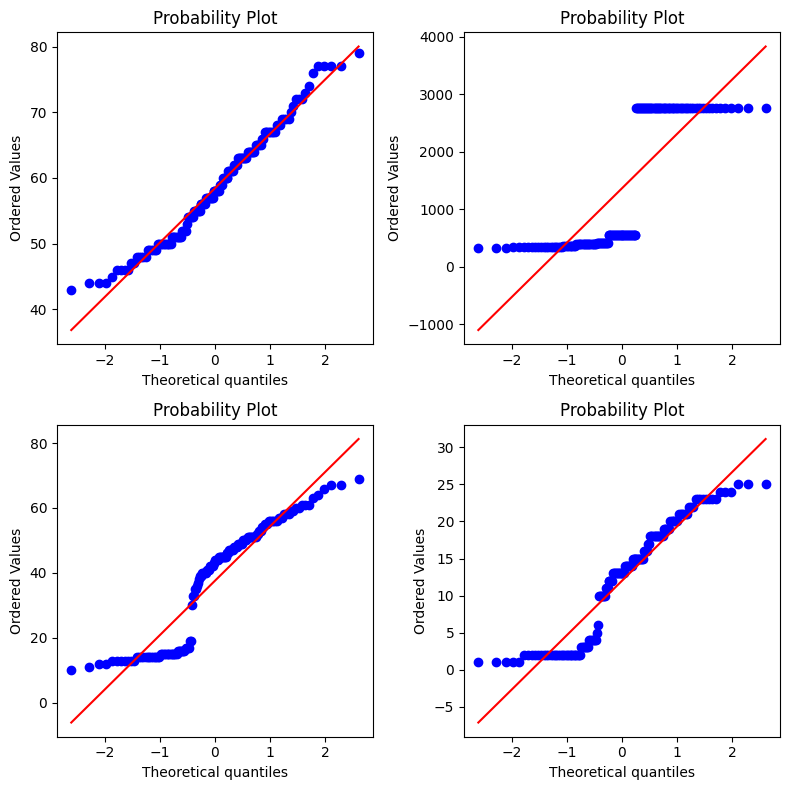

In [4]:
import scipy.stats as stats

fig, ax = plt.subplots(2,2,figsize=(8,8))

for ax, c in zip(ax.flatten(),['clarity', 'price+', 'purity', 'silica']):
  stats.probplot(df[c], dist="norm", plot=ax)

plt.tight_layout()
plt.show()


# Q3.

Considere a base de dados `glasses` de materiais de vidros reciclados.

A)

* Quais dentre os valores 'clarity', 'density', 'purity', 'silica' qual(is) apresenta(m) mais *outliers*?
* Crie um único gráfico (não só uma única figura) para todos valores.

B)

* No gráfico anterior, inclua o `price+`. Veja o que é necessário para melhorar o aspecto do gráfico? Existem *outliers* de preços?

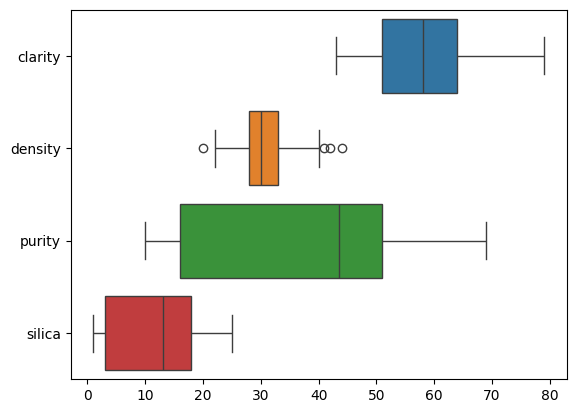

In [5]:
sns.boxplot(data=df[['clarity', 'density', 'purity', 'silica']], orient="h")
plt.show()


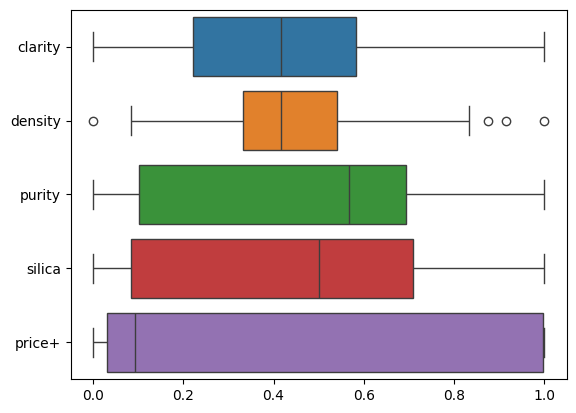

In [6]:
df_norm = df[['clarity', 'density', 'purity', 'silica', 'price+']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

sns.boxplot(data=df_norm, orient="h")
plt.show()


# Q4.

A1.

Considere a base de dados `flights` sobre atrasos de vôos. Você está interessado em determinar uma taxa de penalidade para as companias com maior atraso. Você decide penalizar atrasos superiores aos 20% maiores atrasos do seu histórico. Consire que seriam aplicadas penalidades/multas por vôo - e não pelo atraso médio da companhia.

* Crie os gráficos distribuição e de densidade de probabilidade acumulada em uma única figura e indique com uma linha o ponto de penalidade das companias.
* Preencha colorindo a faixa de valores penalizada.
* Quais companias, no histórico de vôos, seriam então penalizadas? Consire que seriam aplicadas penalidades/multas por vôo - e não pelo atraso médio da companhia.
* Salve sua figura em formato `.png` e poste a figura no Canvas.

A2.

E com um threshold de 95% piores tempos de atraso, quais companhias, no histórico de vôos, seriam penalizadas? Essa parece uma medida eficiente para penalizar as companhias que incidem em atraso?


B.

Qual compania não apresenta *outliers* de atraso?

C.

Considerando 10 intervalos de atraso, qual o intervalo com maior número de ocorrências e a sua quantidade.

In [18]:
flights = pd.read_csv('https://raw.githubusercontent.com/Rogerio-mack/Visualizacao-de-Dados-em-Python/main/data/flights_delays_2015.csv')
flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,12.0,United Air Lines Inc.
3,7.0,United Air Lines Inc.
4,-14.0,United Air Lines Inc.


Remove antecipações,

In [19]:
flights = flights[ flights.arr_delay > 0 ]

Com o threshold de 0.8,

In [30]:
len( flights[ flights.arr_delay > flights.arr_delay.quantile(0.80) ].name.unique() )

13

O que corresponde a todas companhias,

In [32]:
len(flights.name.unique())

13

In [37]:
set(flights.name.unique()) - set(flights[ flights.arr_delay > flights.arr_delay.quantile(0.80) ].name.unique())

set()

Como o threshold de 0.95,

In [39]:
set(flights.name.unique()) - set(flights[ flights.arr_delay > flights.arr_delay.quantile(0.95) ].name.unique())

{'Hawaiian Airlines Inc.'}

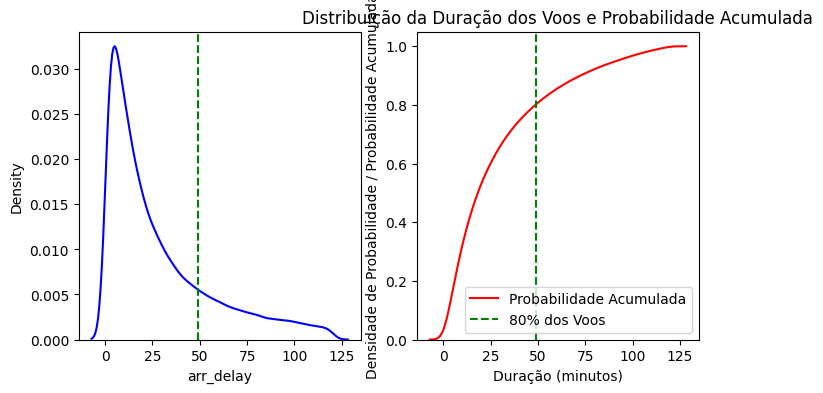

In [8]:
fig, ax = plt.subplots(1,2,figsize=(8,4))


flights = flights[ flights.arr_delay > 0 ].copy()
# Plotar gráfico de densidade de probabilidade
sns.kdeplot(flights['arr_delay'], color='blue', label='Densidade de Probabilidade',ax=ax[0])

# Plotar gráfico de probabilidade acumulada
sns.kdeplot(flights['arr_delay'], cumulative=True, color='red', label='Probabilidade Acumulada',ax=ax[1])

# Marcar o ponto correspondente a duração de 80% dos voos
p = np.percentile(flights['arr_delay'], 80)
ax[0].axvline(p, color='green', linestyle='--', label='80% dos Voos')
ax[1].axvline(p, color='green', linestyle='--', label='80% dos Voos')
plt.legend()
plt.title('Distribuição da Duração dos Voos e Probabilidade Acumulada')
plt.xlabel('Duração (minutos)')
plt.ylabel('Densidade de Probabilidade / Probabilidade Acumulada')
plt.show()


In [42]:
flights.name.unique()

array(['United Air Lines Inc.', 'American Airlines Inc.',
       'JetBlue Airways', 'Delta Air Lines Inc.',
       'Atlantic Southeast Airlines', 'American Eagle Airlines Inc.',
       'US Airways Inc.', 'Southwest Airlines Co.', 'Virgin America',
       'Alaska Airlines Inc.', 'Frontier Airlines Inc.',
       'Hawaiian Airlines Inc.', 'Skywest Airlines Inc.'], dtype=object)

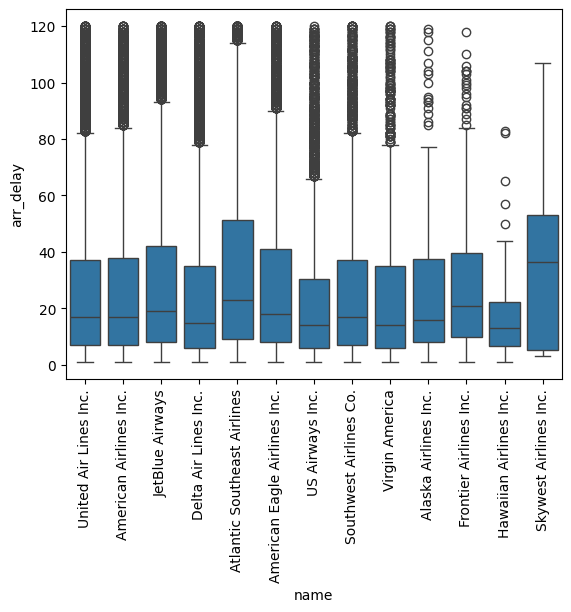

In [9]:
# prompt: Considere o dataframe carregado flights. Faça em um único gráfico um boxplot dos valores de arr_delay por name

sns.boxplot(x = 'name', y = 'arr_delay', data = flights)
plt.xticks(rotation=90)
plt.show()


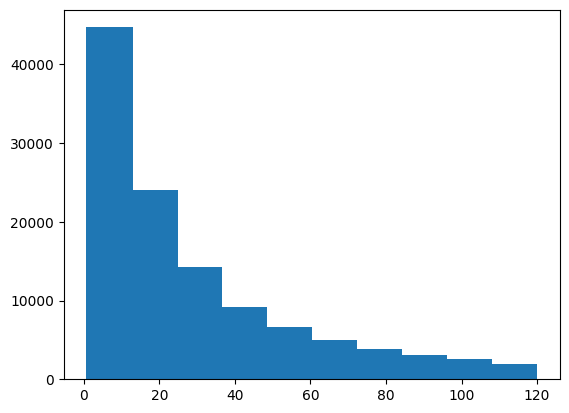

(array([44685., 23982., 14195.,  9192.,  6635.,  4950.,  3877.,  3058.,
         2559.,  1941.]),
 array([  1. ,  12.9,  24.8,  36.7,  48.6,  60.5,  72.4,  84.3,  96.2,
        108.1, 120. ]),
 <BarContainer object of 10 artists>)

In [71]:
valores = plt.hist(flights.arr_delay,bins=10)
plt.bar(x=valores[1][0:-1],height=valores[0])
plt.show()

display(valores)

In [72]:
len(flights[ flights.arr_delay <= 12.9 ])

44685